# Projet 2 : Analysez des données de systèmes éducatifs #

### Import du nécessaire ###

In [1]:
import numpy as np
import pandas as pd
from annexe import annexe as an
import re
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)

## 1. Ouverture et affichage grossier du contenu des fichiers du dataset ##

In [2]:
for num_fichier in range(len(an.FICHIERS)):
    print("Fichier numéro ",num_fichier + 1," :")
    data_frame = an.open_csv(num_fichier)
    
    an.print_samples(data_frame,10)
    print("\n\n\n\n\n")

Fichier numéro  1  :

 EdStatsCountry.csv  is open
fichier avec  241  lignes et  31  colonnes.


Country Code                                    Short Name                  Table Name                                     Long Name 2-alpha code     Currency Unit                                                                                                                                                                                                                           Special Notes                     Region          Income Group WB-2 code  \
117          LAO                                       Lao PDR                     Lao PDR              Lao People's Democratic Republic           LA           Lao kip                                                                                                                                                                                                                                     NaN        East Asia & Pacific   Lower middle income        LA   
8            ARM                                       Armenia                     Armenia                           Republic of Armenia           AM     Armenian dram                                                                                                                                                                                                                                     NaN      Europe & Central Asia   Lower middle income        AM   
148          MNA  Middle East & North Africa (developing only)  Middle East & North Africa  Middle East & North Africa (developing only)           XQ               NaN                                                                                                                                               Middle East and North Africa regional aggregate (does not include high-income economies).                        NaN                   NaN        XQ   
130          LTU                                     Lithuania                   Lithuania                         Republic of Lithuania           LT  Lithuanian litas                                                                                                                                                                                                                                     NaN      Europe & Central Asia  High income: nonOECD        LT   
210          TCA                      Turks and Caicos Islands    Turks and Caicos Islands                      Turks and Caicos Islands           TC       U.S. dollar                                                                                                                                                                                                                                     NaN  Latin America & Caribbean  High income: nonOECD        TC   
217          TON                                         Tonga                       Tonga                              Kingdom of Tonga           TO    Tongan pa'anga  Fiscal year ends on June 30; reporting period for national accounts data: FY. April 2013 database update: Based on data from the National Bureau of Statistics, national accounts data were revised; the base year changed to 2010/11.        East Asia & Pacific   Upper middle income        TO   
57           EAP         East Asia & Pacific (developing only)         East Asia & Pacific         East Asia & Pacific (developing only)           4E               NaN                                                                                                                                                      East Asia and Pacific regional aggregate (does not include high-income economies).                        NaN                   NaN        4E   
88           GUY                                        Guyana                      Guyana               Co-operative Republic of Guyana           GY     Guyana dollar                                                                            In 2010, the Bureau of Statistics introduced a new series of GDP 







Fichier numéro  2  :

 EdStatsCountry-Series.csv  is open
fichier avec  613  lignes et  3  colonnes.


CountryCode         SeriesCode                                                                                                                                                                  DESCRIPTION
129         CYP     NY.GDP.PCAP.KD                                                                                  Data are for areas under the effective control of the Government of the Republic of Cyprus.
130         CZE        SP.POP.TOTL                                                                                                                                                      Data sources : Eurostat
146         EGY        SP.POP.TOTL                                                                                                                     Data sources : United Nations World Population Prospects
328         MDA        SP.POP.TOTL  Data sources : National Bureau of Statistics. Excluding Transnistria. For 1950-94, World Bank estimates using UN World Population Prospects' growth rates of whole Moldova.
6           AFG  NY.GNP.MKTP.PP.CD                                                                                                                                           Estimates are based on regression.
414         PAN        SP.POP.TOTL                                                                                                                     Data sources : United Nations World Population Prospects
293         LBY  NY.GDP.PCAP.PP.KD                                                                                                                                           Estimates are based on regression.
456         SAU        SP.POP.TOTL                                                                                                                     Data sources : United Nations World Population Prospects
572         URY        SP.POP.GROW                                                                                                                      Data sources: United Nations World Population Prospects
565         TZA     NY.GNP.PCAP.CD                                                                                                                                               Covers mainland Tanzania only.







Fichier numéro  3  :

 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.


Country Name Country Code                                                                                                                 Indicator Name           Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998      1999      2000      2001      2002           2003  2004  2005           2006      2007          2008           2009  \
580192                 Morocco          MAR                                                                        Enrolment in early childhood education, female (number)                UIS.E.0.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  276729.0  284978.0  272226.0  269767.0  265455.000000   NaN   NaN  283008.000000  288762.0  278243.00000  305610.000000   
860979                 Vanuatu          VUT                                                          Wittgenstein Projection: Mean Years of Schooling. Age 25+. Gender Gap         PRJ.MYS.25UP.GPI   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN            NaN   NaN   NaN            NaN       NaN           NaN            NaN   
456219              Kazakhstan          KAZ                                                        PASEC: Distribution of 2nd grade language scores: 99th Percentile Score       LO.PASEC.REA.2.P99   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN            NaN   NaN   NaN            NaN       NaN           NaN            NaN   
727430                Slovenia          SVN                                                     PASEC: Distribution of 2nd grade mathematics scores: 10th Percentile Score       LO.PASEC.MAT.2.P10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN            NaN   NaN   NaN            NaN       NaN           NaN            NaN   
336527                 Finland          FIN                                                          TIMSS: Distribution of 8th Grade Science Scores: 5th Percentile Score        LO.TIMSS.SCI8.P05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     407.0       NaN       NaN       NaN            NaN   NaN   NaN            NaN       NaN           NaN            NaN   
724236         Slovak Republic          SVK                                                                PISA: Distribution of Mathematics Scores: 10th Percentile Score          LO.PISA.MAT.P10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN     378.501320   NaN   NaN     370.470478       NaN           NaN     376.203458   
419290               Indonesia          IDN                                                   LLECE: Male 3rd grade students by mathematics proficiency level (%). Level 4       LO.LLECE.MAT3.4.MA   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN            NaN   NaN   NaN            NaN       NaN           NaN            NaN   
586001              Mozambique          MOZ  UIS: Rate of out-of-s







Fichier numéro  4  :

 EdStatsFootNote.csv  is open
fichier avec  643638  lignes et  4  colonnes.


CountryCode            SeriesCode    Year                                     DESCRIPTION
296894         KIR           SH.DYN.MORT  YR2017          5-year average value between 0s and 5s
642793         ZWE       UIS.OE.56.40510  YR2002  UNESCO Institute for Statistics (UIS) estimate
31126          AZE        IT.NET.USER.P2  YR2008                              Population age 7+.
183055         EST     SE.ENR.TERT.FM.ZS  YR1996                                    Country Data
277370         JAM  SE.SEC.ENRL.VO.FE.ZS  YR2002                             Country estimation.
306492         KWT        SE.ADT.LITR.ZS  YR1985                                    Country data
15842          ARE     SE.PRM.REPT.FE.ZS  YR1995                                    Country Data
560262         SWE           SE.PRM.ENRL  YR2002                                       Estimated
548804         SSF        UIS.NERT.2.GPI  YR2006  UNESCO Institute for Statistics (UIS) estimate
501966         QAT           SE.PRM.ENRL  YR1998                                    Country Data







Fichier numéro  5  :

 EdStatsSeries.csv  is open
fichier avec  3665  lignes et  15  colonnes.


Series Code               Topic                                                                                                           Indicator Name  \
1818        PRJ.ATT.4064.3.FE          Attainment   Projection: Percentage of the population age 40-64 by highest level of educational attainment. Upper Secondary. Female   
2883     UIS.EA.5T8.AG25T99.M          Attainment    UIS: Percentage of population age 25+ with at least a completed short-cycle tertiary degree (ISCED 5 or higher). Male   
911      LO.EGRA.ORF.TIG.2GRD   Learning Outcomes                                   EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Tigrinya. 2nd Grade   
1830        PRJ.ATT.60UP.1.FE          Attainment             Projection: Percentage of the population age 60+ by highest level of educational attainment. Primary. Female   
408            HH.DHS.OOS.1.R  Education Equality                                                                         DHS: Proportion of out-of-school. Primary. Rural   
780   LO.EGRA.LSTN.0.ENG.4GRD   Learning Outcomes                              EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade   
133      BAR.PRM.SCHL.3539.FE          Attainment                                                         Barro-Lee: Average years of primary schooling, age 35-39, female   
392            HH.DHS.NIR.1.M  Education Equality                                                      DHS: Net intake rate for the first grade of primary education. Male   
316   BAR.TER.ICMP.4549.FE.ZS          Attainment  Barro-Lee: Percentage of female population age 45-49 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
1074          LO.LLECE.REA3.2   Learning Outcomes                                                      LLECE: 3rd grade students by reading proficiency level (%). Level 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Short definition  \
1818                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            NaN   
2883                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            NaN   
911         Average total number of words correctly read per minute from a narrative or informational reading passage. The oral reading fluency/paragraph reading subtask examines students' ability to read a nar

#### Rapide analyse des 5 fichiers
**1. EdstatCountry.csv**  
On peut voir qu'il y a dans le premier fichier **31 colonnes de 241 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : Country Code,Short Name,Table Name,Long Name,2-alpha code,WB-2 code
 - des categories : Lending category, Currency Unit, Income Group, Government Accounting concept, IMF data dissemination standard
 - des données géographiques : Region
 - des rescencements : National accounts base year, National accounts reference year, SNA price valuation, PPP survey year, Latest population census, Latest household survey, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data
 - d'autres données : Special Notes, Other groups,System of National Accounts,Alternative conversion factor,Balance of Payments Manual in use,External debt Reporting status, System of trade, Source of most recent Income and expenditure data, Vital registration complete 

Ce fichier semble être une source de données générals sur chaque pays.
 
 
**2. EdStatsCountry-Series.csv**  
On peut voir qu'il y a dans le deuxième fichier **3 colonnes de 613 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : CountryCode, SeriesCode.
 - une description : DESCRIPTION.

Ce fichier donne la source des données pour une série à un pays donné.


**3. EdStatsData.csv**  
On peut voir qu'il y a dans le troisième fichier EdStatsData.csv **69 colonnes de 886930 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : Country Name, Country Code, Indicator Name, Indicator Code.
 - des années : de 1970 à 2017, puis de 2020 à 2100 par pas de 5 ans.

Ce fichier donne les nombres pour chaque année de chaque série.


**4. EdStatsFootNote.csv**  
On peut voir qu'il y a dans le quatrième fichier **4 colonnes de 643638 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : CountryCode, SeriesCode.
 - une donnée temporelle : Year.
 - une description : DESCRIPTION.

Ce fichier donne la provenance des données quantitative pour une série, un pays à une année donné.


**5. EdStatsSeries.csv**
On peut voir qu'il y a dans le cinquième et dernier fichier **15 colonnes de 3665 lignes**.  
Dans les colonnes nous trouvons:
 - des identifiants : Series Code.
 - des descriptions : Indicator Name, Topic, Short definition, Long definition.
 - des données temporelles : Periodicity, Base Period.
 - d'autres données : Other notes, Aggregation method, Limitations and exceptions, General comments, Source, Statistical concept and methodology, Development relevance, Related source links.

Ce fichier semble être une source de données descriptives de chaque série .


Après avoir regardé tout les fichiers il ne me parait pas utile de continuer l'exploration dans les fichiers EdStatsCountry-Series.csv et EdStatsFootNote.csv. Le fichier EdstatCountry.csv me parait utile pour la colonne 'Income group' de chaque pays, je vais donc le garder pour plus tard.
Je vais donc continuer avec le fichier EdStatsData.csv pour les données chiffrées. Il me semble que EdStatsSeries.csv contient des explications sur les lvariables de EdStatsData.csv, si besoin j'utiliserais donc EdStatsSeries.csv pour mieux comprendre EdStatsData.csv.

Je vois dans EdStatsData.csv que l'on parle d'éducation, de primaire, secondaire, peut-être tertiaire. On parle aussi d'années moyennes de scolarité.

## 2. Recherche de variable en fonction de mots clé

Je vais essayer de faire ressortir tout les différents type de variables (colonne:'Indicator Name') du fichier EdStatsData.csv contenant : school, student, secondary, tertiary, educational, inhabitant, household, technology, computer, Internet et population. 

In [3]:
fichierESD = an.open_csv(2)
variable_list = an.indicator_name_list(fichierESD)


 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.
Pour le regex  secondary  :  847  variables de trouvé
Pour le regex  tertiary  :  278  variables de trouvé
Pour le regex  school|educationnal  :  418  variables de trouvé
Pour le regex  student  :  577  variables de trouvé
Pour le regex  inhabitant|household  :  0  variables de trouvé
Pour le regex  population  :  468  variables de trouvé
Pour le regex  technology|computer|internet  :  32  variables de trouvé


### 2.1 Regard des résultats

Je vais regarder pour chaque mot clé les variables obtenues et prendre celles qui nous interessent sans trop faire de tri.

In [6]:
display(variable_list[an.INDEX.index('secondary')])

{'Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, female (number)',
 'Africa Dataset: Graduates from accredited pre-service primary or secondary teacher training programmes, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service primary or secondary teacher training programmes, fe

Pour **secondary** les variables intéressantes sont :  
-Adjusted net enrolment rate, upper secondary, both sexes (%)  
-Barro-Lee: Average years of secondary schooling, age 15+, total  
-Barro-Lee: Average years of secondary schooling, age 25+, total  
-Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary  
-Current expenditure as % of total expenditure in secondary public institutions (%)  
-Enrolment in Grade 6 of lower secondary general education, both sexes (number)  
-Enrolment in post-secondary non-tertiary education, both sexes (number)  
-Enrolment in secondary education, both sexes (number)  
-Gross enrolment ratio, upper secondary, both sexes (%)  
-School life expectancy, secondary, both sexes (years)  

In [7]:
display(variable_list[an.INDEX.index('tertiary')])

{'All staff compensation as % of total expenditure in tertiary public institutions (%)',
 'Barro-Lee: Average years of tertiary schooling, age 15+, female',
 'Barro-Lee: Average years of tertiary schooling, age 15+, total',
 'Barro-Lee: Average years of tertiary schooling, age 15-19, female',
 'Barro-Lee: Average years of tertiary schooling, age 15-19, total',
 'Barro-Lee: Average years of tertiary schooling, age 20-24, female',
 'Barro-Lee: Average years of tertiary schooling, age 20-24, total',
 'Barro-Lee: Average years of tertiary schooling, age 25+, female',
 'Barro-Lee: Average years of tertiary schooling, age 25+, total',
 'Barro-Lee: Average years of tertiary schooling, age 25-29, female',
 'Barro-Lee: Average years of tertiary schooling, age 25-29, total',
 'Barro-Lee: Average years of tertiary schooling, age 30-34, female',
 'Barro-Lee: Average years of tertiary schooling, age 30-34, total',
 'Barro-Lee: Average years of tertiary schooling, age 35-39, female',
 'Barro-Lee: Av

Pour **tertiary** les variables intéressantes sont :  
-Adjusted net enrolment rate, upper secondary, both sexes (%)  
-Barro-Lee: Average years of tertiary schooling, age 25+, total  
-Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary  
-Current expenditure as % of total expenditure in tertiary public institutions (%)  
-Enrolment in tertiary education per 100,000 inhabitants, both sexes  
-Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)  
-Graduates from tertiary education, both sexes (number)  
-UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total  
-Gross enrolment ratio, tertiary, both sexes (%)  
-School life expectancy, tertiary, both sexes (years)  

In [8]:
display(variable_list[an.INDEX.index('school|educationnal')])

{'Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)',
 'Africa Dataset: Average size of classes in primary schools (number of pupils)',
 'Africa Dataset: Average size of multigrade classes in primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 1 of primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 2 of primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 3 of primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 4 of primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 5 of primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 6 of primary schools (number of pupils)',
 'Africa Dataset: Average size of single grade classes in Grade 7 of primary schools 

Pour **school et educationnal** les variables intéressantes sont :  
-UIS: Percentage of population age 25+ with no schooling. Total  
-Wittgenstein Projection: Mean years of schooling. Age 25+. Total  
-UIS: Mean years of schooling of the population age 25+. Total  
-Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total  
-Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total  
-Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total  

In [9]:
display(variable_list[an.INDEX.index('student')])

{'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Bamanankan. 2nd Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Bomu. 2nd Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Chichewa. 2nd Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Chichewa. 4th Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 2nd Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 3rd Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 4th Grade',
 'EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). English. 6th Grade'

Pour **student** il n'y aucune variable interessante.

In [10]:
display(variable_list[an.INDEX.index('population')])

{'Adult illiterate population, 15+ years, % female',
 'Adult illiterate population, 15+ years, both sexes (number)',
 'Adult illiterate population, 15+ years, female (number)',
 'Adult illiterate population, 15+ years, male (number)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, gender parity index (GPI)',
 'Adult literacy rate, population 15+ years, male (%)',
 'Barro-Lee: Percentage of female population age 15+ with no education',
 'Barro-Lee: Percentage of female population age 15-19 with no education',
 'Barro-Lee: Percentage of female population age 20-24 with no education',
 'Barro-Lee: Percentage of female population age 25+ with no education',
 'Barro-Lee: Percentage of female population age 25-29 with no education',
 'Barro-Lee: Percentage of female population age 30-34 with no education',
 'Barro-Lee: Percentage of female population age 35-39 with no educati

Pour **population** les variables intéressantes sont :  
-UIS: Percentage of population age 25+ with a completed short-cycle tertiary degree (ISCED 5). Total  
-UIS: Percentage of population age 25+ with a completed bachelor's or equivalent degree (ISCED 6). Total  
-UIS: Percentage of population age 25+ with a completed master's or equivalent degree (ISCED 7). Total  
-UIS: Percentage of population age 25+ with at least a completed short-cycle tertiary degree (ISCED 5 or higher). Total  
-UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher). Total  
-UIS: Percentage of population age 25+ with at least a completed master's degree or equivalent (ISCED 7 or higher). Total  
-UIS: Percentage of population age 25+ with a doctoral degree or equivalent (ISCED 8). Total  
-UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total  


In [24]:
display(variable_list[an.INDEX.index('technology|computer|internet')])

{'Internet users (per 100 people)',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Below Level 1',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Failed the ICT Core Test',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 1',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 2',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Level 3',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience',
 'PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment',
 'PIAAC: Distribution of Adult Problem Solving in Technology-Rich Environments Scores: 10th Percentile Score',
 'PIAAC: Distribution of Adult Problem Solving in Technology-Ri

Pour **technology, computer et internet** les variables intéressantes sont :  
-Internet users (per 100 people)  
-Personal computers (per 100 people)

### 2.2 Tri des données intéressentes

J'ai pour objectif de déterminer les pays avec un fort potentiel de clients pour academy. Je dois aussi pouvoir présenter l'évolution du potentiel de client pour chaque pays. Tout ça me permettra de définir des pays ou l'entreprise doit opérer en priorité.  
  
Je vais donc maintenant faire un second tri sur mes variables obtenu précédemment afin de me rapprocher de ces objectifs.  
  
Avant de regarder chaque pays je dois déterminer leur **niveau technologique** afin de savoir si la population a accès à des ordinateurs et à internet. Je compte trouver des pays adapté à nos services tout d'abord en regardant le nombre de personnes utilisant internet pour ce pays **(1.)** et le coupler avec le nombre d'ordinateur personnel que la population possèdent **(2.)**.  
Pour visualiser le **potentiel de clients de chaque pays** je pense le montrer avec le nombres de personnes entrant en études dans les tranches souhaité  **(3.)** couplé avec le nombre d'années d'études que font les gens dans se pays  **(4.)**(pour cette dernière variable, j'ai deux jeux de données, je vais les garder et les comparer afin de soit prendre le plus complet soit prendre de l'information dans les deux).  
Pour **l'évolution du potentiel de client pour chaque pays** je vais observer la prévision du nombre d'étudiant **(5.)** .
<!-- avec le nombre d'années d'études que chaque étudiant aimerait faire **(6.)**.   -->
  
Les variables présenté au dessus seront faites grâce aux catégories suivantes.  

**1.** Nombre d'utilisateur d'internet pour 100 personnes:  
-Internet users (per 100 people)  
**2.** Nombre d'ordinateurs personnel pour 100 personnes:  
-Personal computers (per 100 people) 
  
**3.** Nombres de personnes entrant en études dans les catégories qui nous interessent:  
-Enrolment in Grade 6 of lower secondary general education, both sexes (number)  
-Enrolment in post-secondary non-tertiary education, both sexes (number)  
-Enrolment in secondary education, both sexes (number)  
-Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)  
-Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)  
**4.** Nombre d'années d'études moyenne par personne agé de plus de 25 ans:  
-Barro-Lee: Average years of secondary schooling, age 25+, total  
-Barro-Lee: Average years of tertiary schooling, age 25+, total  
ou:
-UIS: Mean years of schooling of the population age 25+. Total 

**5.** Prévision en millier du nombre d'étudiants:  
-Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total  
-Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total  
<!-- **6.** Nombre d'années d'études que voudrait faire les étudiants:  
-School life expectancy, secondary, both sexes (years)  
-School life expectancy, tertiary, both sexes (years)  -->
  
Les variables que je n'ai pas gardé étaient soit redondantes dans l'information qu'elles apportaient soit ne donnaient que des fragments que ce que d'autres catégories apportent.

## 3.Préparation des dataframes

### 3.1 Garder les colonnes qui nous intéresses

Je veux garder dans le fichier **EdStatsCountry** 'Country Code','Short Name' et 'Income Group'.  
Pour le fichier **EdStatsData** je veux garder les colonnes 'Country Name','Country Code','Indicator Name' et les colonnes des années entre 2001 et 2031, prendre les années avant 2001 et après 2031 me parais trop éloigné de la date d'aujourd'hui.

In [11]:
ESC_column_to_keep = ['Country Code','Short Name','Income Group']
ESD_column_to_keep = ['Country Name','Country Code','Indicator Name'] + list(map(str,[*range(2001,2018,1)])) + list(map(str,[*range(2020,2031,5)]))

fichierESC = an.to_keep(0,ESC_column_to_keep)
fichierESD = an.to_keep(2,ESD_column_to_keep)


 EdStatsCountry.csv  is open
fichier avec  241  lignes et  31  colonnes.
nouveau format du fichier :  241  lignes et  3  colonnes.

 EdStatsData.csv  is open
fichier avec  886930  lignes et  69  colonnes.
nouveau format du fichier :  886930  lignes et  23  colonnes.


### 3.2 Enlever les variables vides

Je vais enlever toutes les variables qui non aucune données numérique.

In [12]:
fichierESC2 = fichierESC.dropna(axis = 'index',thresh = 3)
fichierESD2 = fichierESD.dropna(axis = 'index',thresh = 4)
print("le fichier avait ",fichierESC.shape[0]," variables, il a maintenant ",fichierESC2.shape[0]," variables")
print("le fichier avait ",fichierESD.shape[0]," variables, il a maintenant ",fichierESD2.shape[0]," variables")

le fichier avait  241  variables, il a maintenant  214  variables
le fichier avait  886930  variables, il a maintenant  347465  variables


Les deux fichiers ont été allégé de beaucoup de variables par rapport à leur taille respectives, ce qui est un gain pour les calculs suivant.

### 3.3 Création des catégories intéressantes

Je regroupe dans des catégories les variables intéressantes du point 2.2.

In [13]:
new_students = ['Enrolment in Grade 6 of lower secondary general education, both sexes (number)','Enrolment in post-secondary non-tertiary education, both sexes (number)','Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)','Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)','Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)','Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)']
study_years_more_25 = ['Barro-Lee: Average years of secondary schooling, age 25+, total','Barro-Lee: Average years of tertiary schooling, age 25+, total']
study_years_mean_25 = ['UIS: Mean years of schooling of the population age 25+. Total']
study_years_expected = ['School life expectancy, secondary, both sexes (years)','School life expectancy, tertiary, both sexes (years)']
new_students_prediction = ['Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total','Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total']
internet_users = ['Internet users (per 100 people)']
computer_owner = ['Personal computers (per 100 people)']

Je regroupe dans un dataframe toute les variables composant une catégorie, et ce pour chaque catégorie.

In [14]:
dataframe_new_students = an.take_needed_rows(fichierESD2,new_students)
dataframe_study_years_more_25= an.take_needed_rows(fichierESD2,study_years_more_25)
dataframe_study_years_mean_25= an.take_needed_rows(fichierESD2,study_years_mean_25)
dataframe_study_years_expected= an.take_needed_rows(fichierESD2,study_years_expected)
dataframe_new_students_prediction= an.take_needed_rows(fichierESD2,new_students_prediction)
dataframe_internet_users= an.take_needed_rows(fichierESD2,internet_users)
dataframe_computer_owner= an.take_needed_rows(fichierESD2,computer_owner)

J'additione maintenant les valeurs par pays pour n'avoir qu'une variable par pays pour chaque catégorie.

In [15]:
dataframe_new_students_sum = dataframe_new_students.groupby(['Country Code']).sum()
dataframe_study_years_more_25_sum= dataframe_study_years_more_25.groupby(['Country Code']).sum()
dataframe_study_years_mean_25_sum= dataframe_study_years_mean_25.groupby(['Country Code']).sum()
dataframe_study_years_expected_sum= dataframe_study_years_expected.groupby(['Country Code']).sum()
dataframe_new_students_prediction_sum= dataframe_new_students_prediction.groupby(['Country Code']).sum()
dataframe_internet_users_sum= dataframe_internet_users.groupby(['Country Code']).sum()
dataframe_computer_owner_sum= dataframe_computer_owner.groupby(['Country Code']).sum()

## 4. Affichage des données obtenues

### 4.1 Les groupes de revenu

Je vais modifier le fichier edStatCountry.csv pour l'affichage puis vous montrer la répartition des pays par groupes de revenu.

In [16]:
fichierESC3 = an.replace_ESC(fichierESC2,0)
fichierESC3b = an.replace_ESC(fichierESC2,1)

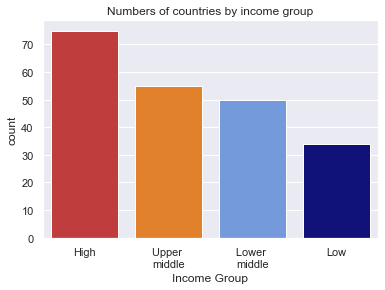

In [17]:
an.sns_graph(fichierESC3)

Beaucoup de pays ont un haut revenu ce qui est très intéressant pour nous car cela implique que nous ayons beaucoup de possibilité où investir.

In [18]:
an.choropleth_map(fichierESC3b,'Income group in ascending order')

Les pays avec les plus gros revenu sont bien sûr les pays développé, pour notre marché il sera logique d'en prendre un venant de cette catégorie.

### 4.2 Niveau technologique

#### 4.2.1 Évolution de l'utilisation d'internet

In [19]:
dataframe_internet_users_sum2 = an.clean_data(dataframe_internet_users_sum,0.7)

In [20]:
new_range = an.create_range(dataframe_internet_users_sum2,3)
for year in new_range:
    an.choropleth_map(dataframe_internet_users_sum2,'Internet user per 100 person in ',True,str(year))

On constate que l'utilisation d'internet est vraiment devenu un phénomène mondial. Peu de pays on une moyenne sous les 50%. On peut penser que les utilisateur d'aujourd'hui sont les nouvelles générations et les entreprises.

#### 4.2.2  Évolution de l'utilisation d'ordinateurs personnelle 

In [21]:
dataframe_computer_owner_sum2 = an.clean_data(dataframe_computer_owner_sum,0.7)

In [22]:
new_range = an.create_range(an.ratio_epuration(dataframe_computer_owner_sum2,0.7),3)
for year in new_range:
    an.choropleth_map(dataframe_computer_owner_sum2,'Computer owner per 100 person in ',True,str(year))

L'ordinateur personnel c'est propagé dans peu de pays, mais les données sont incomplètes après 2005, on pourra peut être prendre ses données mais il faudra faire attention à leur utilisation pour pas leur données trop de valeurs dû au biais que cela pourrait engendrer.

### 4.3 Potentiel de clients par pays

#### 4.3.1 Nombre d'étudiants par pays

In [23]:
dataframe_new_students_sum2 = an.clean_data(dataframe_new_students_sum,0.7)

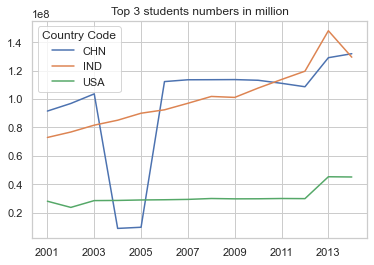

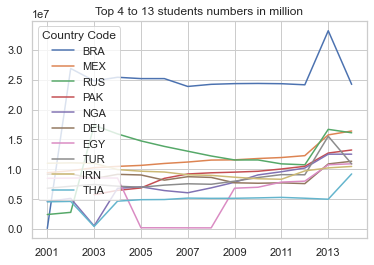

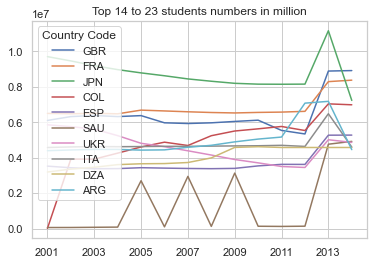

In [78]:
an.print_top_values(dataframe_new_students_sum2,"students numbers in million",0,3,"2014")
an.print_top_values(dataframe_new_students_sum2,"students numbers in million",4,13,"2014")
an.print_top_values(dataframe_new_students_sum2,"students numbers in million",14,23,"2014")

Deux gros pays que sont la Chine et l'Inde arrivent en tête, les États-Unis et le Brésil suivent puis beaucoup de pays sont dans une même tranche du nombre d'étudiants. Cette données monter qu'il y a un fort potentiel de client dans beaucoup de pays.

#### 4.3.2 Moyenne d'années d'études par personnes agé de plus de 25ans par pays

J'ai deux dataframe pour une meme données (même si celles si ne sont pas exprimer à partir de la même base d'études. Je vais les afficher et garder celle qui me conviens le mieux.

##### 4.3.2.1 Dataframe dataframe_study_years_more_25_sum2

In [25]:
dataframe_study_years_more_25_sum2 = an.clean_data(dataframe_study_years_more_25_sum,0.1)

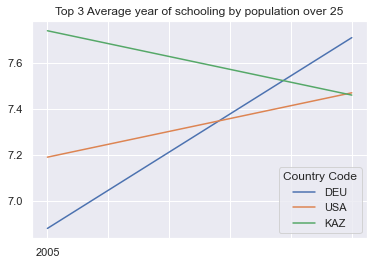

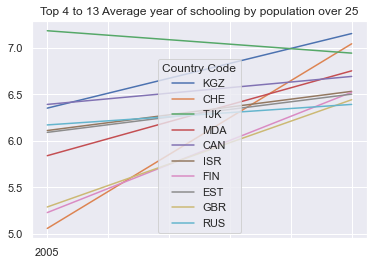

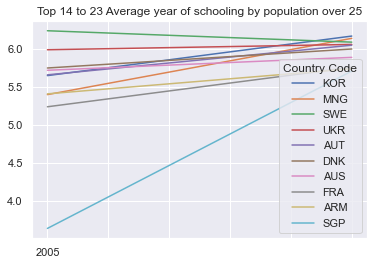

In [26]:
an.print_top_values(dataframe_study_years_more_25_sum2,"Average year of schooling by population over 25",0,3,sort_year="2010")
an.print_top_values(dataframe_study_years_more_25_sum2,"Average year of schooling by population over 25",4,13,sort_year="2010")
an.print_top_values(dataframe_study_years_more_25_sum2,"Average year of schooling by population over 25",14,23,sort_year="2010")

##### 4.3.2.1 Dataframe dataframe_study_years_mean_25_sum2

In [27]:
dataframe_study_years_mean_25_sum2 = an.clean_data(dataframe_study_years_mean_25_sum,0.1)

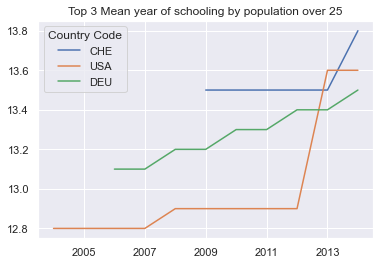

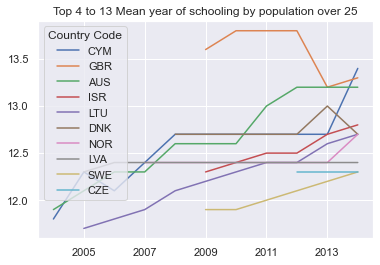

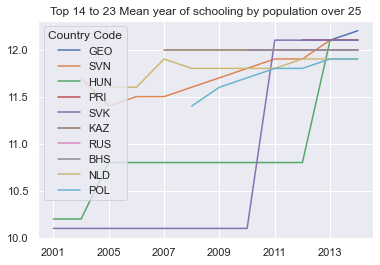

In [28]:
an.print_top_values(dataframe_study_years_mean_25_sum2,"Mean year of schooling by population over 25",0,3,'2014')
an.print_top_values(dataframe_study_years_mean_25_sum2,"Mean year of schooling by population over 25",4,13,'2014')
an.print_top_values(dataframe_study_years_mean_25_sum2,"Mean year of schooling by population over 25",14,23,'2014')

Les deux dataframe sont très lacunaire, j'ai baissé mon paramètre pour garder les années si elles sont au dessus de 10% de données sur tout les pays.  
Le dataframe **dataframe_study_years_more_25_sum** n'a que deux années de rempli et la dernière est 2010.  
Le dataframe **dataframe_study_years_mean_25_sum** a de 2001(parfois) à 2014.  
Je vais garder la deuxième juste parce que la dernière année présente est plus récente que celle du premier dataframe.

### 4.4 Évolution du dotentiel de clients par pays

#### 4.4.1 Prédiction du nombre d'étudiants par pays

In [29]:
dataframe_new_students_prediction_sum2 = an.clean_data(dataframe_new_students_prediction_sum,0.7)

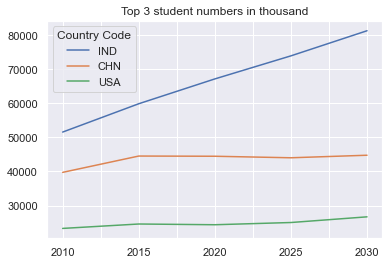

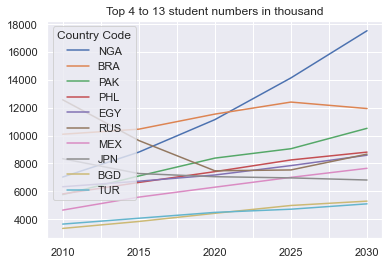

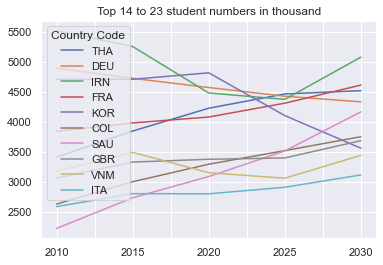

In [30]:
an.print_top_values(dataframe_new_students_prediction_sum2,"student numbers in thousand",0,3,sort_year='2025')
an.print_top_values(dataframe_new_students_prediction_sum2,"student numbers in thousand",4,13,sort_year='2025')
an.print_top_values(dataframe_new_students_prediction_sum2,"student numbers in thousand",14,23,sort_year='2025')

J'ai classé les pays pour l'année 2025 car 2030 me parait bien trop éloigné. On retrouve le même top 3 de tête que pour le nombre d'étudiants ce qui est logique. Chaque pays fini par une courbe croissante d'étudiant à par le Brésil, l'Allemagne et la Corée, mieux vaudrait inverstir dans un pays ou la courbe reste croissante pour les effets sur le long therme.

#### 4.4.2 Nombre d'années d'études souhaité par les étudiants

In [66]:
dataframe_study_years_expected_sum2 = an.clean_data(dataframe_study_years_expected_sum,0.7)

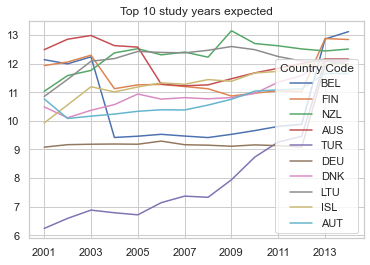

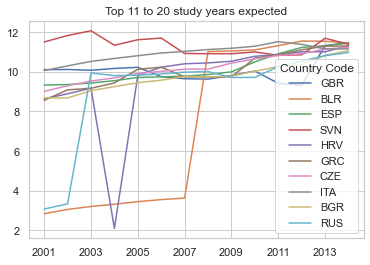

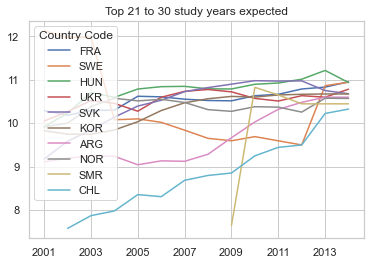

In [67]:
an.print_top_values(dataframe_study_years_expected_sum2,"study years expected",0,10,'2014')
an.print_top_values(dataframe_study_years_expected_sum2,"study years expected",11,20,'2014')
an.print_top_values(dataframe_study_years_expected_sum2,"study years expected",21,30,'2014')

Beaucoup de pays ont une moyenne au dessus de 10 années d'études souhaité par les étudiants.

## 5. Présentation des résultats

### 5.1 Pays pouvant postulé pour academy

Pour qu'un pays soit envisageable commercialement il doit d'abord remplir quelques critères. Le pays doit être riche afin que les ménages puissent avoir de l'argent a investir dans l'éducation, je ne prendrais donc en compte que les pays dans le "High Income Group". Pour la téléformation, la population doit être connecté à internet et cette dernière doit avoir des ordinateurs personnel à disposition.  
Je recommande un classement telle que:  
Le classement se fait d'abord par Income Group, puis par Internet Users et pour finir par Computer Owner
Je préconise 4 tranches par variables pour Internet Users et Computer Owner basé sur la plus haute valeur des dataframes. Je ne tiendrais pas compte de l'année car pour moi il parait logique qu'un pays se maintienne à peu près au même rang mondial dans les années à venir ( sauf pour les pays en développement qui évolus très vite mais qui ne rattrape pas pour autant leur retard).  

Je crée les rang pour chaque variables puis je les groupe dans un seul dataframe.

In [68]:
rank_income_group = fichierESC3b.replace([5,4],[4,3]).sort_values(by='Income Group',ascending=False)
rank_internet_users = an.rank_dataframe(dataframe_internet_users_sum,'Internet')
rank_computer_owners = an.rank_dataframe(dataframe_computer_owner_sum,'Computer')
classement = rank_income_group.merge(rank_internet_users.merge(rank_computer_owners,left_on="Country Code",right_on="Country Code"),left_on="Country Code",right_on="Country Code")

Je ne vais garder que les pays avec un score de 4 pour l'Income Group comme expliqué dans l'introduction de ce chapitre. Pour les ordinateurs et internet je vais garder que les pays faisant parti du group 3 ou 4 car les autres pays ne me paraissent pas assez équipé.

In [69]:
top_of_countries = classement.drop(classement[(classement['Income Group'] < 3) | (classement['Internet'] < 3) | (classement['Computer'] < 3)].index)
print(top_of_countries.shape[0]," pays peuvent postuler pour academy ")
top_of_countries.sort_values(by=["Income Group","Internet","Computer"],ascending=False)

24  pays peuvent postuler pour academy 


Country Code            Short Name  Income Group  Internet  Computer
2           GBR        United Kingdom             4         4         4
5           NLD           Netherlands             4         4         4
46          USA         United States             4         4         4
50          SWE                Sweden             4         4         4
56          CAN                Canada             4         4         4
59          CHE           Switzerland             4         4         4
4           FRA                France             4         4         3
6           FIN               Finland             4         4         3
7           NOR                Norway             4         4         3
10          NZL           New Zealand             4         4         3
12          DNK               Denmark             4         4         3
20          IRL               Ireland             4         4         3
25          ISL               Iceland             4         4         3
27          LUX            Luxembourg             4         4         3
32          HKG  Hong Kong SAR, China             4         4         3
34          DEU               Germany             4         4         3
39          BHR               Bahrain             4         4         3
43          AUT               Austria             4         4         3
44          AUS             Australia             4         4         3
49          KOR                 Korea             4         4         3
53          SVK       Slovak Republic             4         4         3
57          SAU          Saudi Arabia             4         4         3
58          SGP             Singapore             4         4         3
51          SMR            San Marino             4         3         4

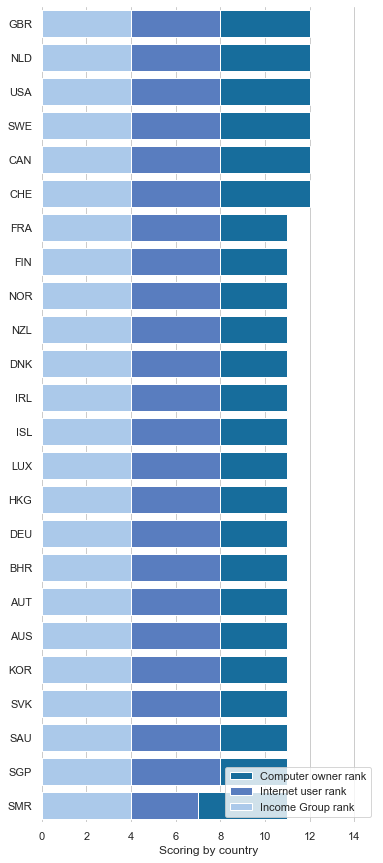

In [119]:
dataframe2 = classement.drop(classement[(classement['Income Group'] < 3) | (classement['Internet'] < 3) | (classement['Computer'] < 3)].index)
dataframe2["Internet2"] = dataframe2["Income Group"] + dataframe2["Internet"]
dataframe2["Computer2"] = dataframe2["Income Group"] + dataframe2["Internet"] + dataframe2["Computer"]
columns_and_names = [["Income Group","Internet2","Computer2"],["Income Group rank","Internet user rank","Computer owner rank"]]
sort_values = ["Income Group","Internet","Computer"]
an.horizontal_bar_plot_tri(dataframe2)

### 5.2 Pays avec un fort potentiel de clients

Pour connaître le potentiel de clients parmis les 24 pays selectionné je vais utiliser comme variable le nombre d'étudiants par années et la moyenne d'années d'études par personne de plus de 25 ans.  
Pour ces deux variables je vais prendre la valeur la plus récente et je vais les multiplier entre elles pour avoir le nombre potentiel de client par pays durant toute leur scolarité, puis je vous montrerais le classement de ces pays.

In [75]:
top_countries = dataframe2.drop(dataframe2.columns.difference(["Country Code"]),1)

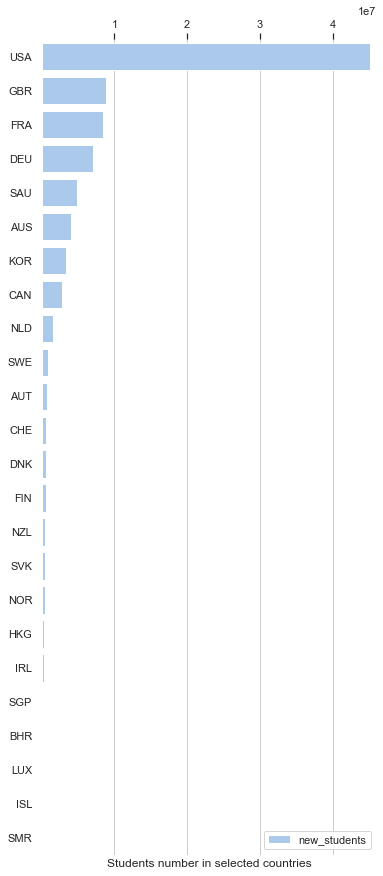

In [125]:
new_students_in_selected_countries = dataframe_new_students_sum.loc[top_countries["Country Code"].tolist(),:]
new_students_sum = an.last_value(new_students_in_selected_countries,'new_students')
an.horizontal_bar_plot_mono(new_students_sum,'new_students','Students number in selected countries',10000,46000000)

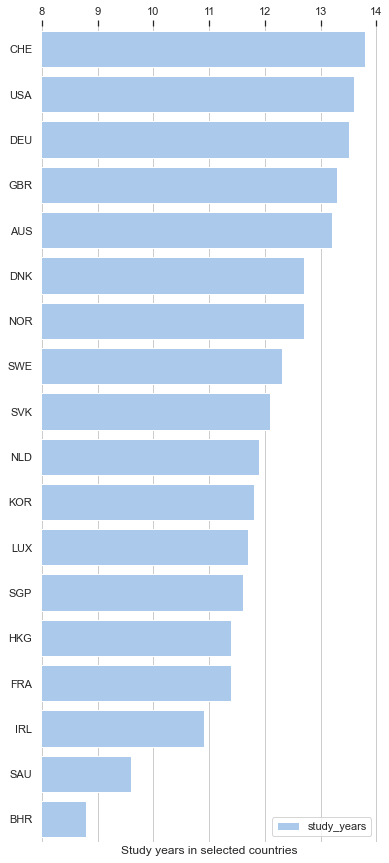

In [127]:
top_countries2 = an.top_countries_with_data(top_countries)
new_study_years_sum = dataframe_study_years_mean_25_sum.loc[top_countries2["Country Code"].tolist(),:]
new_study_years_sum2 = an.last_value(new_study_years_sum,'study_years')
# display(new_study_years_sum)
an.horizontal_bar_plot_mono(new_study_years_sum2,'study_years','Study years in selected countries',8,14)

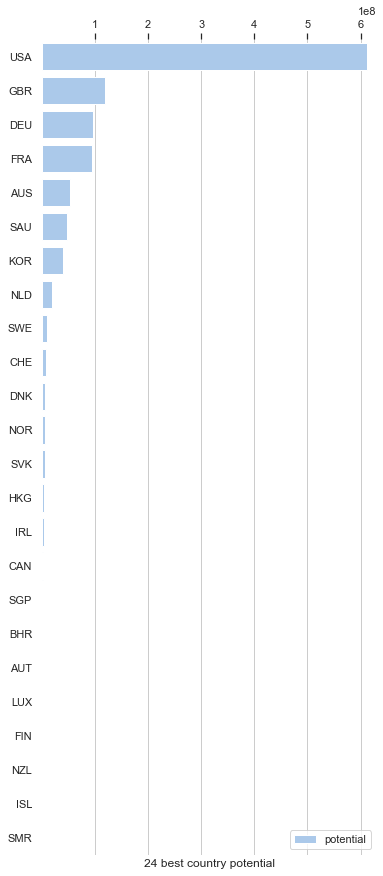

In [133]:
selected_countries = top_countries["Country Code"].to_list()
students_potential = an.potential_years_study(new_students_sum,new_study_years_sum2,selected_countries)
an.horizontal_bar_plot_mono(students_potential,'potential','24 best country potential',1000,630000000)

Voici une liste classée par ordre décroissant des meilleurs potentiels pour nos services. les meilleurs pays sont donc dans l'ordre: Les États-unis d'Amérique, l'Angleterre, l'Allemagne, la France (mais nos services y sont déjà), l'Australie, l'Arabie saoudite, la Corée, Les Pays-Bas, la Suède, la Suisse, le Danemark, la Norvège, la Slovaquie, Hong Kong, l'Irlande, le Canada, Singapour, le Barheïn, l'Autriche, le Luxembourg, la Finlande, la Nouvelle Zélande, l'Islande et Saint-Marin. Certaines données manquantes sur le nombre d'année d'étude des étudiants font que des pays se retrouvent sous classés(par exemple le Canada), mais cela n'affecte en rien le premier du classement.

### 5.3 Évolution du potentiel de clients

Pour connaître l'évolution du potentiel de clients parmis les 23 pays selectionné (j'ai enlevé volaiterement Saint Marin car trop de données manquées) je vais utiliser comme variable la prédiction du nombre d'étudiants par années et le nombre d'années d'études souhaité par la population.  
Pour la prédiction du nombre d'étudiants par années, je vais prendre 2020 et les années à venir jusqu'a 2030, donc 2020,2025 et 2030 et pour le nombre d'années d'études souhaité par la population je vais prendre la plus récente valeur. Je vais multiplié ses deux valeurs afin d'avoir une prédiction sur le potentiel de client par pays durant toute leur scolarité, puis je vous montrerais le classement de ces pays.

In [136]:
selected_countries2 = selected_countries.remove('SMR')
dataframe_new_students_prediction_sum_selected = dataframe_new_students_prediction_sum.loc[selected_countries,:]
prediction_new_students_sum = an.take_value(dataframe_new_students_prediction_sum_selected,'prediction_new_students',['2020','2025','2030'])
prediction_new_students_sum2 = prediction_new_students_sum.sort_values(by=["prediction_new_students_2030","prediction_new_students_2025","prediction_new_students_2020"],ascending=False).head(25)

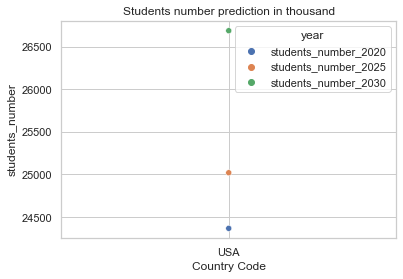

In [143]:
final_df = an.transforme_for_scatterplot(prediction_new_students_sum2)
an.scatterplot_student_number(final_df,"USA Students number prediction in thousand",1,1)

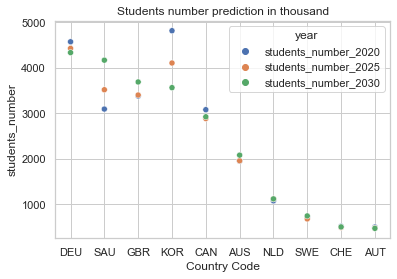

In [160]:
an.scatterplot_student_number(final_df,"Students number prediction in thousand",3,12)

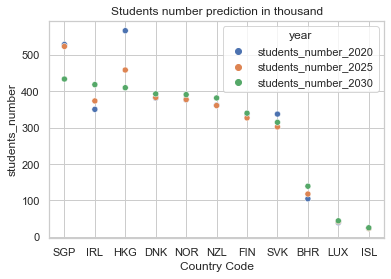

In [147]:
an.scatterplot_student_number(final_df,"Students number prediction in thousand",13,int(len(final_df)/3))

In [153]:
new_study_years_expected_sum = an.last_value(dataframe_study_years_expected_sum,'study_year_expected')
# selected_countries3 = selected_countries.remove('SGP')
top_countries2 = top_countries.drop(top_countries[top_countries["Country Code"] == "SGP"].index)
new_study_years_expected_sum = new_study_years_expected_sum.loc[top_countries2["Country Code"].tolist(),:]
display(new_study_years_expected_sum.sort_values("study_year_expected",ascending=False))

study_year_expected
Country Code                     
FIN                      12.84354
NZL                      12.51135
AUS                      12.16171
DEU                      12.10798
DNK                      12.10199
ISL                      11.96972
AUT                      11.65367
GBR                      11.47216
FRA                      10.94976
SWE                      10.94043
SVK                      10.67504
KOR                      10.67028
NOR                      10.56790
SMR                      10.44333
USA                      10.30275
CHE                       9.71492
SAU                       9.53547
HKG                       9.40882
NLD                       7.90126
LUX                       7.14493
CAN                       6.59589
IRL                       3.37072
BHR                       1.70752

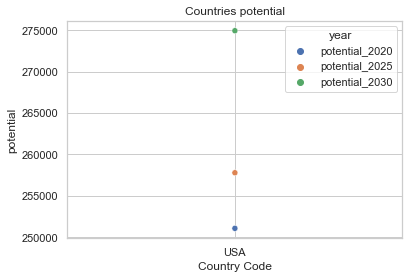

In [185]:
an.display_potential_years_study(new_study_years_expected_sum,final_df,1,1)

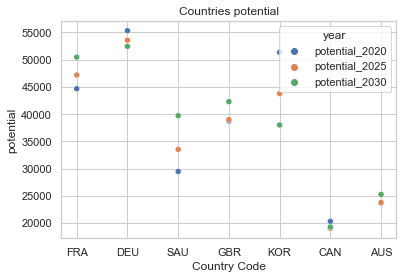

In [186]:
an.display_potential_years_study(new_study_years_expected_sum,final_df,2,8)

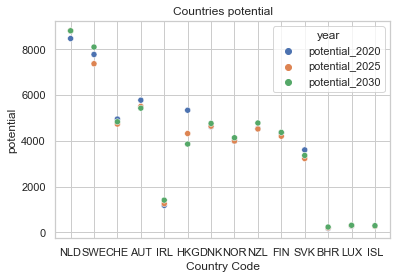

In [187]:
an.display_potential_years_study(new_study_years_expected_sum,final_df,9,int(len(final_df)/3)-1)

Les valeurs obtenues sont plus faible qu'au **5.2** dû au fait que les valeur prédictive ne sont pas forcement exacte mais reflète une tendance de la croissance du pays.  
On peut voir que les Etats-Unis sont clairement en tête de classement, puis viennent la France, l'Allemagne, l'Arabie saoudite, l'Angleterre, la Corée, le Canada, l'Australie puis le reste. 
On voit aussi que certains potentiels décroissent, dû surement à la décroissance de la natalité dans certains pays.

### 6. Conclusion

Les États-Unis sont le grand favori pour investir. Il y a actuellement 4 fois plus de potentiel clients que pour le deuxième de notre liste. Le futur potentiel est quand à lui 5 fois plus important que le second. Investir là bas amèneras à coup sûr du profit.